In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import copy

# Shuffle Data

In [2]:
data = pd.read_csv('final_train_pl.csv')
data_used = data.sample(frac = 1).drop('Unnamed: 0',axis = 1)
data_used = data_used.reset_index(drop = True)

# Cross Validation

In [4]:
x = data_used.drop('class',axis = 1)
y = data_used['class']

kf = KFold(n_splits = 5)
kappa = 0
for train_index, test_index in kf.split(x):
    print('train_index', train_index, 'test_index', test_index)
    train_X, train_y = x.iloc[train_index], y[train_index]
    test_X, test_y = x.iloc[test_index], y[test_index]
    classifier = XGBClassifier(max_depth = 20, n_estimators = 200,objective = 'multi:softmax',num_class = 3)
    classifier.fit(train_X,train_y)
    y_predict = classifier.predict(test_X)
    kappa += cohen_kappa_score(test_y,y_predict)
    print(kappa/5)

train_index [ 2712  2713  2714 ... 13553 13554 13555] test_index [   0    1    2 ... 2709 2710 2711]
0.1428810569072334
train_index [    0     1     2 ... 13553 13554 13555] test_index [2712 2713 2714 ... 5420 5421 5422]
0.28298866808169176
train_index [    0     1     2 ... 13553 13554 13555] test_index [5423 5424 5425 ... 8131 8132 8133]
0.42388423835860545
train_index [    0     1     2 ... 13553 13554 13555] test_index [ 8134  8135  8136 ... 10842 10843 10844]
0.5658731261418086
train_index [    0     1     2 ... 10842 10843 10844] test_index [10845 10846 10847 ... 13553 13554 13555]
0.708504488045877


In [5]:
feature_imp = pd.Series(classifier.feature_importances_,index = x.columns).sort_values(ascending = False)
feature_imp.head(20)

blogger_fans           0.227511
video                  0.099476
blogger_tag            0.092525
blogger_posts          0.070144
blogger_gender         0.063652
picture                0.061206
blogger_follows        0.050226
post                   0.041059
no_related_accounts    0.040093
no_topics              0.034521
brand_fans             0.031129
brand_hot_topic        0.028540
brand_follows          0.028101
product_price          0.027744
produc_score           0.027043
brand_posts            0.026820
product_popularity     0.025172
brand_gender           0.025040
dtype: float32

No handles with labels found to put in legend.


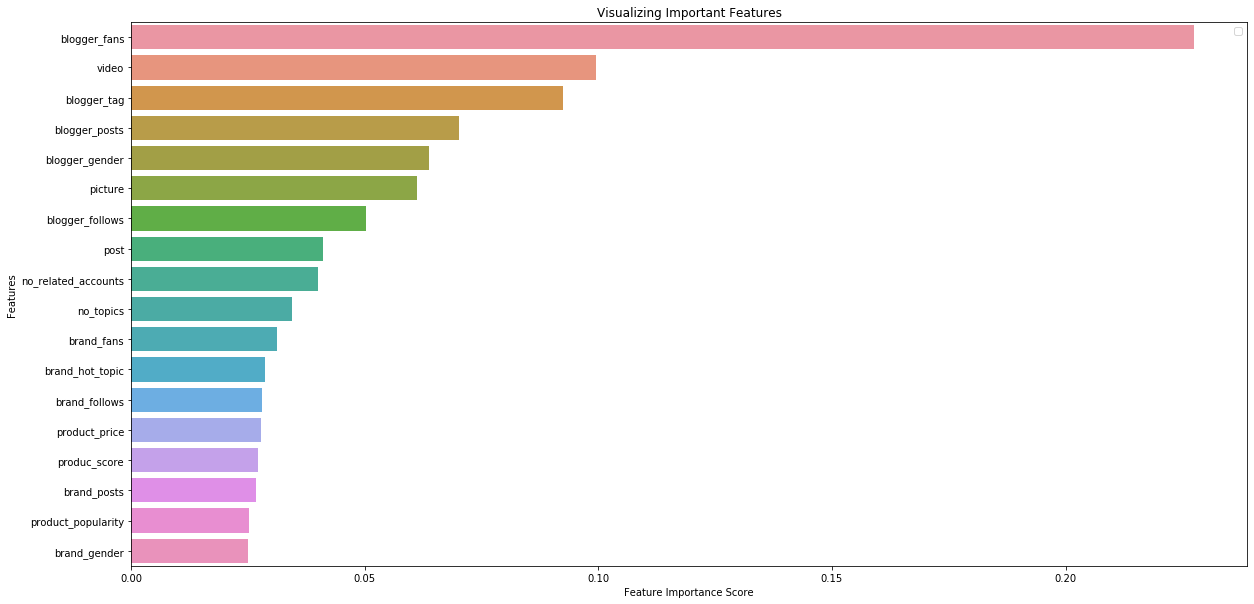

In [6]:
plt.figure(figsize = (20,10)) 

# create a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()